# Heat and salt budgets
In this script, we test for the correctness of the melt rate calculations in the two- and three-equation models,
and the boundary salinity calculation in the three-equation model, 
by verifying that the calcualted values result in heat and salt fluxes that balance the latent heat and freshwater source terms.

In other words, we test that the left hand side balances the right hand side of the heat and salt conservation equations 
that make up the two- and three-equation models.

For the `TwoEquationMeltModel`, the heat conservation equation is
$$L2 = O2 + I2,$$
where $L2 = \rho_i L_i \dot{m}$ is the latent heat released, $O2 = \rho_w c_w \gamma_{TS} U (T_w-T_f)$ is the ocean heat flux term, and $I2 = \rho_ic_i(T_i-T_f)\dot{m}$ is the ice heat flux term.

The the `ThreeEquationMeltModel`, the heat conservation equation is
$$L3 = O3 + I3,$$
where $L3 = \rho_i L_i \dot{m}$, $O3 = \rho_w c_w \gamma_T U (T_w - T_b)$, and $I3 = \rho_i c_i (T_i - T_b)\dot{m}$. 
The `TheeEquationMeltModel` also involves a salt conservation equation,
$$SI3 = SO3,$$
where $SI3 = \rho_i S_b \dot{m}$ is the salt flux into the region that changes phase as a result of melting or freezing, and $SO3 = \rho_w\gamma_SU(S_w-S_b)$ is the salt flux from the ambient ocean into the ice-ocean boundary layer.

For more detailed explanations, see the `melt-model-explanations.ipynb` Jupyter notebook.

In this notebook, we verify that the implementations of the melt models in this Python module satisfy the necessary conservation equations.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from icemeltmodels import TwoEquationMeltModel, ThreeEquationMeltModel

In [15]:
U_ref = 0.1
T = np.linspace(-2, 5)
S_ref = 35.0
p_ref = 500000.0

In [16]:
model2 = TwoEquationMeltModel()
model3 = ThreeEquationMeltModel()

ThreeEquationMeltModelNeglectingConduction ocean_heat_flux()
Using ThreeEquationMeltModel boundary_salinity()
Using ThreeEquationMeltModel boundary_salinity()
Using ThreeEquationMeltModel boundary_salinity()
Using ThreeEquationMeltModel boundary_salinity()


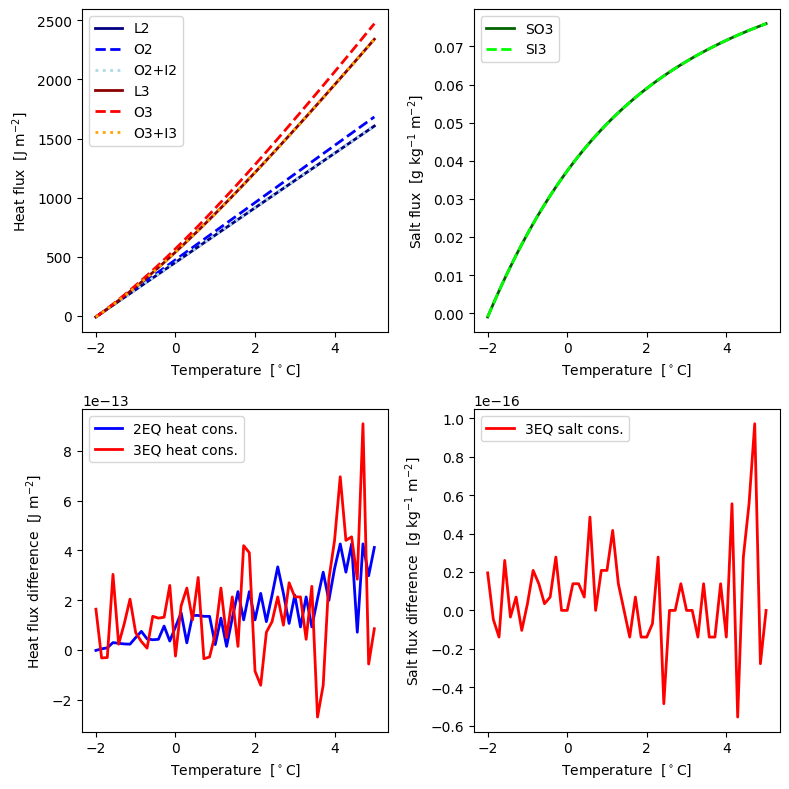

In [21]:
# Latent heat release (rho_i * L_i * m_dot)
latent2 = model2.latent_heat_release(U_ref, T, S_ref, p_ref)
latent3 = model3.latent_heat_release(U_ref, T, S_ref, p_ref)

# Ocean heat flux (rho_w * c_w * gamma * U * (T_w - T_b)
ocean2 = model2.ocean_heat_flux(U_ref, T, S_ref, p_ref)
ocean3 = model3.ocean_heat_flux(U_ref, T, S_ref, p_ref)

# Ice heat flux (rho_i * c_i * (T_i - T_b) * m_dot)
ice2 = model2.ice_heat_flux(U_ref, T, S_ref, p_ref)
ice3 = model3.ice_heat_flux(U_ref, T, S_ref, p_ref)

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
lw=2
# Plot the terms in the heat conservation equation.
ax.plot(T, latent2, color="navy", ls="solid", lw=lw, label="L2")
ax.plot(T, ocean2, color="blue", ls="dashed", lw=lw, label="O2")
ax.plot(T, ocean2 + ice2, color="lightblue", ls="dotted", lw=lw, label="O2+I2")

ax.plot(T, latent3, color="darkred", ls="solid", lw=lw, label="L3")
ax.plot(T, ocean3, color="red", ls="dashed", lw=lw, label="O3")
ax.plot(T, ocean3 + ice3, color="orange", ls="dotted", lw=lw, label="O3+I3")

ax.set_xlabel(r"Temperature  [$^\circ$C]")
ax.set_ylabel(r"Heat flux  [J m$^{-2}$]")
ax.legend()

# Plot the difference between LHS and RHS of heat equation (should be zero)
ax3.plot(T, latent2 - ocean2 - ice2, color="blue", lw=lw, label="2EQ heat cons.")
ax3.plot(T, latent3 - ocean3 - ice3, color="red", lw=lw, label="3EQ heat cons.")
ax3.set_xlabel(r"Temperature  [$^\circ$C]")
ax3.set_ylabel(r"Heat flux difference  [J m$^{-2}$]")
ax3.legend()

oceansalt3 = model3.ocean_salt_flux(U_ref, T, S_ref, p_ref)
icesalt3 = model3.ice_salt_flux(U_ref, T, S_ref, p_ref)

# Plot the salt conservation equation terms for the Three Equation Model
ax2.plot(T, oceansalt3, color="darkgreen", ls="solid", lw=lw, label="SO3")
ax2.plot(T, icesalt3, color="lime", ls="dashed", lw=lw, label="SI3")
ax2.set_xlabel(r"Temperature  [$^\circ$C]")
ax2.set_ylabel(r"Salt flux  [g kg$^{-1}$ m$^{-2}$]")
ax2.legend()

# Plot the difference between LHS and RHS of salt equation (should be zero)
ax4.plot(T, oceansalt3 - icesalt3, color="red", lw=lw, label="3EQ salt cons.")
ax4.set_xlabel(r"Temperature  [$^\circ$C]")
ax4.set_ylabel(r"Salt flux difference  [g kg$^{-1}$ m$^{-2}$]")
ax4.legend()

plt.tight_layout()

# Success!

In the top two plots, the overlap between
* the O2+I2 curve with the L2 curve,
* the O3+I3 curve with the L3 curve, and
* the SO3 curve with the SI3 curve

indicate that the heat and salt conservation budgets close successfully (at least for the tested range of input parameter values).

The plots underneath show the differences between the source terms (latent heat and salt release terms) on the left hand sides of the heat and salt conservation equations, respectively, and the corresponding flux terms on the right hand sides. The differences are within $10^{-12}$, within the precision of floating point calculations.